# Python Imports

In [ ]:
# spacy modulos em portugues
!python -m spacy download pt_core_news_sm
## deplacy
!pip install deplacy stanza
# imports
import string
import pandas as pd
import csv
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import stanza
import deplacy
import graphviz
import matplotlib.pyplot as plt
# Baixar os recursos do NLTK
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('wordnet')
# Carregar o modelo do Spacy em português
nlp = spacy.load("pt_core_news_sm")

2023-07-03 08:44:05.815699: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 08:44:06.882592: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 73.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.5/802.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 30.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=fd4fd1f2e8f21ea2db8c97cb595c83770ef3cc79036ad790d24b2f2e135674ca
  Stored in directory: /r

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Comparando dicionários lexicos

In [ ]:
# Inicializar os stemmers e lemmatizers
stemmer = RSLPStemmer()
lemmatizer = WordNetLemmatizer()

# Função para exibir o mapa sintático da frase utilizando Stanza e Deplacy
def exibirMapaSintatico(frase):
  nlp_stanza = stanza.Pipeline("pt")
  doc = nlp_stanza(frase)
  deplacy.render(doc)
  graphviz.Source(deplacy.dot(doc))

# Função para exibir a distribuição de palavras e nuvem de palavras
def visualizarDistribuicaoPalavras(collection, top):
  cv = CountVectorizer(stop_words=stopwords.words('portuguese'))
  words = cv.fit_transform(collection)
  sum_words = words.sum(axis=0)

  words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
  words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

  frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

  frequency.head(top).plot(x='word', y='freq', kind='bar', figsize=(20, 7), color='blue')
  wordcloud = WordCloud(background_color='white', width=1000, height=1000).generate_from_frequencies(dict(words_freq))
  plt.figure(figsize=(20, 8))
  plt.imshow(wordcloud)
  plt.title("WordCloud", fontsize=22)
  plt.show()

# Carregar o arquivo CSV com o dicionário Oplexicon
dict_oplexicon = {}
csvfile = pd.read_csv("https://drive.google.com/uc?id=1iUCi4LRaOnHpcthw86KpuYqNzFKlcpZn&export=download", low_memory=False)
for index, row in csvfile.iterrows():
  palavra = row[0]
  polaridade = row[2]
  dict_oplexicon[palavra] = polaridade

# Carregar o arquivo CSV com o dicionário Unilex
dict_unilex = {}
csvfile = pd.read_csv("https://drive.google.com/uc?id=1AViTEwjiwCwh2yoiCeNd-hjx2ysN5xxO&export=download", low_memory=False)
for index, row in csvfile.iterrows():
  palavra = row[0]
  polaridade = row[1]
  dict_unilex[palavra] = polaridade

# Carregar o arquivo CSV com o dicionário WordNetAffectBr
dict_wordnetaffectbr = {}
csvfile = pd.read_csv("https://drive.google.com/uc?id=18q63AB7uSVIyRMENi4Dgx9Kchn-yv_pe&export=download", low_memory=False)
for index, row in csvfile.iterrows():
  palavra = row[0]
  polaridade = row[1]
  dict_wordnetaffectbr[palavra] = polaridade

# Função de pré-processamento do texto
def preprocessamento(texto):
  texto = str(texto).lower()
  documento = nlp(texto)
  lista = []

  for token in documento:
    lista.append(lemmatizer.lemmatize(token.text))

  lista = [palavra for palavra in lista if palavra not in stopwords.words('portuguese') and palavra not in string.punctuation and not palavra.isdigit()]
  return lista

# Função para obter a polaridade da frase usando um dicionário
def obterPolaridade(frase, dicionario):
  frase_processada = preprocessamento(frase)
  frase_polaridade = [float(dicionario.get(palavra, 0)) for palavra in frase_processada]
  score = sum(frase_polaridade)
  return score

# Função para analisar o sentimento da frase usando diferentes dicionários
def analisarSentimento(frase, dicionarios):
  scores = [obterPolaridade(frase, dicionario) for dicionario in dicionarios]
  return scores

# Função para imprimir os valores associados a cada palavra da frase
def printLexiconPhrase(frase):
  phrases = {}
  for palavra in frase.lower().translate(str.maketrans('', '', string.punctuation)).split(" "):
    phrases[palavra.strip()] = lexicon.get(palavra.strip(), None)
  for palavra, valor in phrases.items():
    print(palavra, ": ", valor)
# Função para criar o conjunto de dados a partir dos eventos do Colab
def criarDataset(colab_events):
  dataset = colab_events.drop(columns=['status', 'created_at', 'event_type_id', 'event_type_name'])
  return dataset

# Ajustando o motor de sentimento

# Adicionar palavras extras e corrigir valores de palavras no dicionário lexicon
lexicon = dict_oplexicon.copy()
lexicon.update(dict_unilex)
lexicon.update(dict_wordnetaffectbr)

palavras_lexicon = {
    "colabora": 1,
    "rua": 1,
    "iptu": -1,
    "prefeito": -1,
    "prefeitos": -1,
    "irregulares": -1,
    "indesejadas": -1,
    "bastasse": -1,
    "pública": 1,
    "horrorosas": -1,
    "indigência": -1,
    "inadequados": -1,
    "pt": -1,
    "psdb": -1,
    "pdt": -1,
    "corrupção": -1,
    "varias": -1,
    "árvore": 1,
    "urgente": 1,
    "número": 1,
    "frente": 1,
    "façam": -1,
    "asfaltem": -1,
    "prefeitura": 0.5,
    "sofreu": -1,
    "extremamente": -1,
    "mal": -1,
    "dejetos": -1,
    "vistoria": -1,
    "responsabilidade": -1,
    "secretaria": -1,
    "providência": -1,
    "gargalhadas": -1,
    "barulho": -1,
    "botequim": -1,
    "colab": -1,
    "algazarra": -1,
    "descaso": -1,
    "deveria": -1,
    "providências": -1,
    "reclamação": -1,
    "irrespirável": -1,
    "recorrentes": -1,
    "irregularidade": -1,
    "irregularidades": -1,
    "trabalhando": 1,
    "trabalhado": 1,
    "transparente": 1,
    "resolver": 0.5,
    "problemas": 0.5,
    "obstáculos": -1,
    "abismo": -1,
    "descumprimento": -1
}

for palavra, valor in palavras_lexicon.items():
  lexicon[palavra] = valor

# Testando a polaridade das frases de exemplo
frases_teste = [
    "Isso é culpa dos prefeitos que não ligam para a população",
    "Eu pago meu IPTU em dia é um absurdo isso acontecer",
    "Parabéns a prefeitura que tem trabalhado de uma forma transparente para resolver os problemas da cidade",
    "Fiação sem vergonha na Vila Olímpia. Fios caem até o chão, pondo em perigo a segurança do pedestre.",
    "Calçadão de Boa Viagem com várias depressões e buracos causados por infiltração de água",
    "O descumprimento da política nacional de mobilidade é evidente nessa intervenção feita na ponte Paulo Guerra. Não basta o resto da calçada da ponte estar esburacada e cheia de obstáculos, é preciso também abrir um abismo para o pedestre ter que ultrapassar. Essa alça construída para dar acesso ao Shopping Riomar é imoral e com certeza haverá atropelamentos, que chamarão de 'acidentes'. Não será acidente, será apenas o fruto de uma infraestrutura toda voltada para o fluxo de automóveis individuais em detrimento do pedestre em descumprimento a lei federal. Infelizmente o Ministério Público não intervém nesse caso. Ainda estamos muito longe de atingir a acessibilidade universal."
]

for frase in frases_teste:
  print("Polaridade da frase '", frase, "':", obterPolaridade(frase, lexicon))
  print("BREAKDOWN LEXICON")
  printLexiconPhrase(frase)
  print()

Polaridade da frase ' Isso é culpa dos prefeitos que não ligam para a população ': -2.0
BREAKDOWN LEXICON
isso :  None
é :  None
culpa :  -1
dos :  None
prefeitos :  -1
que :  None
não :  None
ligam :  None
para :  None
a :  None
população :  None

Polaridade da frase ' Eu pago meu IPTU em dia é um absurdo isso acontecer ': 22.0
BREAKDOWN LEXICON
eu :  None
pago :  -1
meu :  None
iptu :  -1
em :  None
dia :  29
é :  None
um :  None
absurdo :  -4
isso :  None
acontecer :  -1

Polaridade da frase ' Parabéns a prefeitura que tem trabalhado de uma forma transparente para resolver os problemas da cidade ': 11.5
BREAKDOWN LEXICON
parabéns :  None
a :  None
prefeitura :  0.5
que :  None
tem :  None
trabalhado :  1
de :  None
uma :  None
forma :  4
transparente :  1
para :  None
resolver :  0.5
os :  None
problemas :  0.5
da :  None
cidade :  4

Polaridade da frase ' Fiação sem vergonha na Vila Olímpia. Fios caem até o chão, pondo em perigo a segurança do pedestre. ': -5.0
BREAKDOWN LEXICON
fi

# Análise de Sentimento das postagens

In [ ]:
# Carregar os dados do CSV de eventos do Colab
colab_events_url = "https://drive.google.com/uc?id=1pC9m4-k4e_I98MA_8G9mF-h6wCntd1Qu&export=download"
colab_events = pd.read_csv(colab_events_url, low_memory=False)
# Criar o dataset a partir dos eventos do Colab
dataset = criarDataset(colab_events)

# Calcular os scores das postagens usando o lexicon
scores = []
for index, row in dataset.iterrows():
  post = row[2]
  score = obterPolaridade(post, lexicon)
  scores.append(score)

dataset["score"] = scores

# Top Scores

In [ ]:
# Filtrar os piores e melhores scores
worst_scores = dataset.sort_values(by='score', ascending=True).head(1000)
best_scores = dataset.sort_values(by='score', ascending=False).head(1000)

# Visualizando Breakdown Léxico

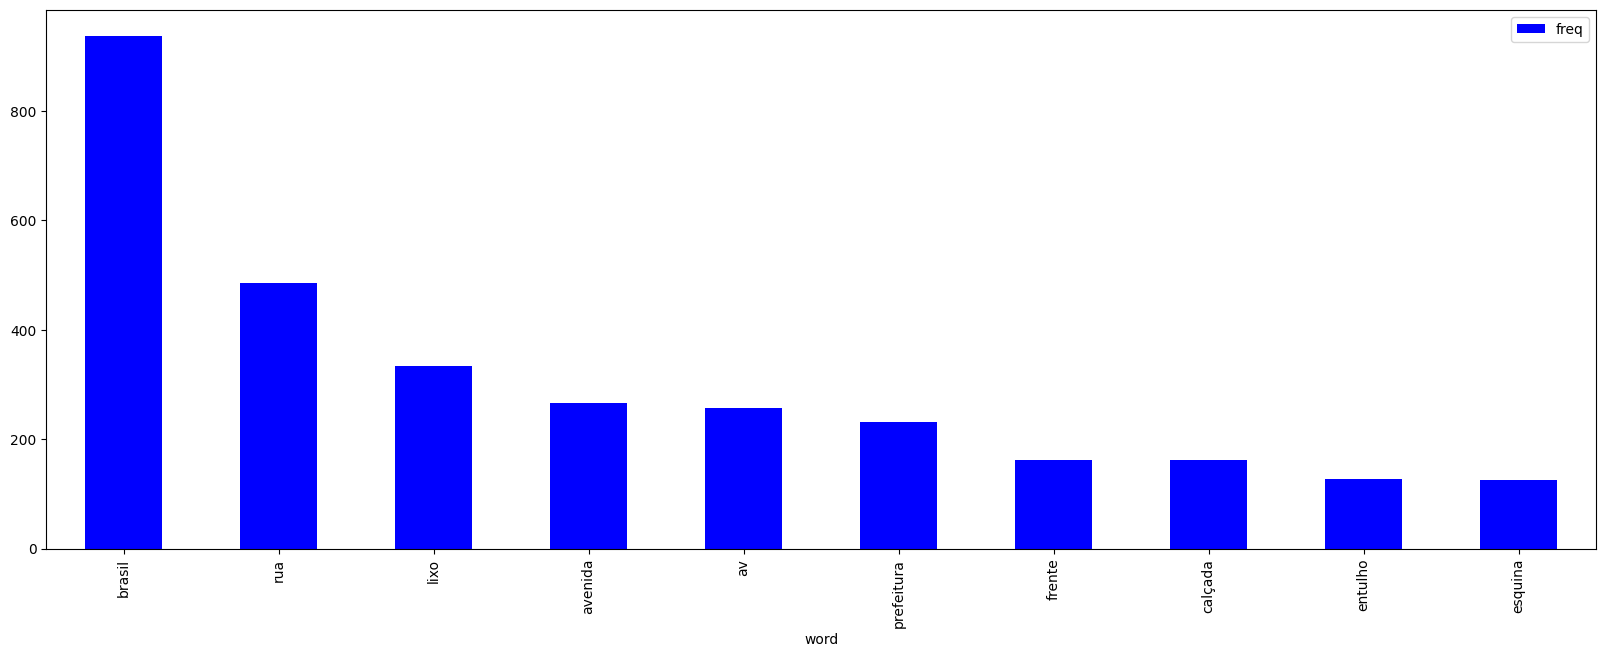

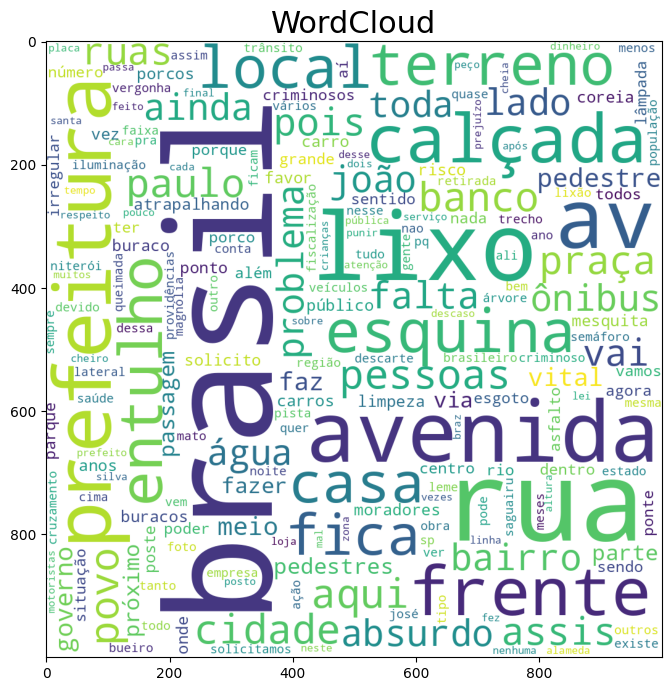

In [ ]:
# Visualizar a distribuição de palavras nos piores scores
visualizarDistribuicaoPalavras(worst_scores['description'], 10)

In [ ]:
# Exibir o mapa sintático de uma postagem com pior score
exibirMapaSintatico(worst_scores['description'].values[0])

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor    | Package |
--------------------------
| tokenize     | bosque  |
| mwt          | bosque  |
| pos          | bosque  |
| lemma        | bosque  |
| constituency | cintil  |
| depparse     | bosque  |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


Veja       VERB  ═╗═══════════════════════╗═╗ root
abaixo     ADV   <╝                       ║ ║ advmod
os         DET   <══════════════════════╗ ║ ║ det
candidatos NOUN  ═╗═══════════════════╗═╝<╝ ║ obj
reeleitos  VERB  <╝                   ║     ║ acl
que        PRON  <══════════════════╗ ║     ║ nsubj
já         ADV   <════════════════╗ ║ ║     ║ advmod
começaram  VERB  ═╗═══╗═════════╗═╝═╝<╝     ║ acl:relcl
mal        ADV   <╝   ║         ║           ║ advmod
a          DET   <══╗ ║         ║           ║ det
nova       ADJ   <╗ ║ ║         ║           ║ amod
etapa      NOUN  ═╝═╝<╝         ║           ║ obj
,          PUNCT <════════════╗ ║           ║ punct
faltando   VERB  ═══════════╗═╝<╝           ║ advcl
a          ADP   <════════╗ ║               ║ case
o          DET   <══════╗ ║ ║               ║ det
primeiro   ADJ   <════╗ ║ ║ ║               ║ amod
dia        NOUN  ═══╗═╝═╝═╝<╝               ║ obl
de         ADP   <╗ ║                       ║ case
trabalho   NOUN  ═╝<╝   

/usr/local/lib/python3.10/dist-packages/stanza/utils/conll.py:126: UserWarning: doc2conll is deprecated.  Please use "{:C}".format(doc) and use the text format directly
  doc_conll = CoNLL.doc2conll(doc, include_comments=False)
/usr/local/lib/python3.10/dist-packages/deplacy/deplacy.py:290: UserWarning: convert_dict is deprecated.  Please use "{:C}".format(doc) and use the text format directly
  return CoNLL.conll_as_string(CoNLL.convert_dict(doc.to_dict()))
/usr/local/lib/python3.10/dist-packages/deplacy/deplacy.py:290: UserWarning: conll_as_string is deprecated.  Please use "{:C}".format(doc) and use the text format directly
  return CoNLL.conll_as_string(CoNLL.convert_dict(doc.to_dict()))


In [ ]:
# Exibir os valores associados a cada palavra da postagem com pior score
printLexiconPhrase(worst_scores['description'].values[0])

veja :  2
abaixo :  2
os :  None
candidatos :  -1
reeleitos :  None
que :  None
já :  None
começaram :  None
mal :  -1
a :  None
nova :  3
etapa :  None
faltando :  1
ao :  None
primeiro :  0
dia :  29
de :  None
trabalho

andré :  None
bueno :  None
pdt
artagão :  None
júnior :  None
pmdb
bernardo :  None
ribas :  None
carli :  None
psdb
caíto :  None
quintana :  None
pmdb
dr :  None
batista :  None
pmn
élio :  None
rusch :  None
dem
ênio :  None
verri :  None
pt
evandro :  None
psdb
fernando :  None
scanavaca :  None
pdt
gilson :  None
souza :  None
psc
jonas :  None
guimarães :  None
pmdb
luiz :  None
claudio :  None
romanelli :  None
pmdb
nereu :  None
moura :  0
pmdb
ney :  None
leprevost :  None
psd
paranhos :  None
psc
péricles :  None
mello :  None
pt :  -1


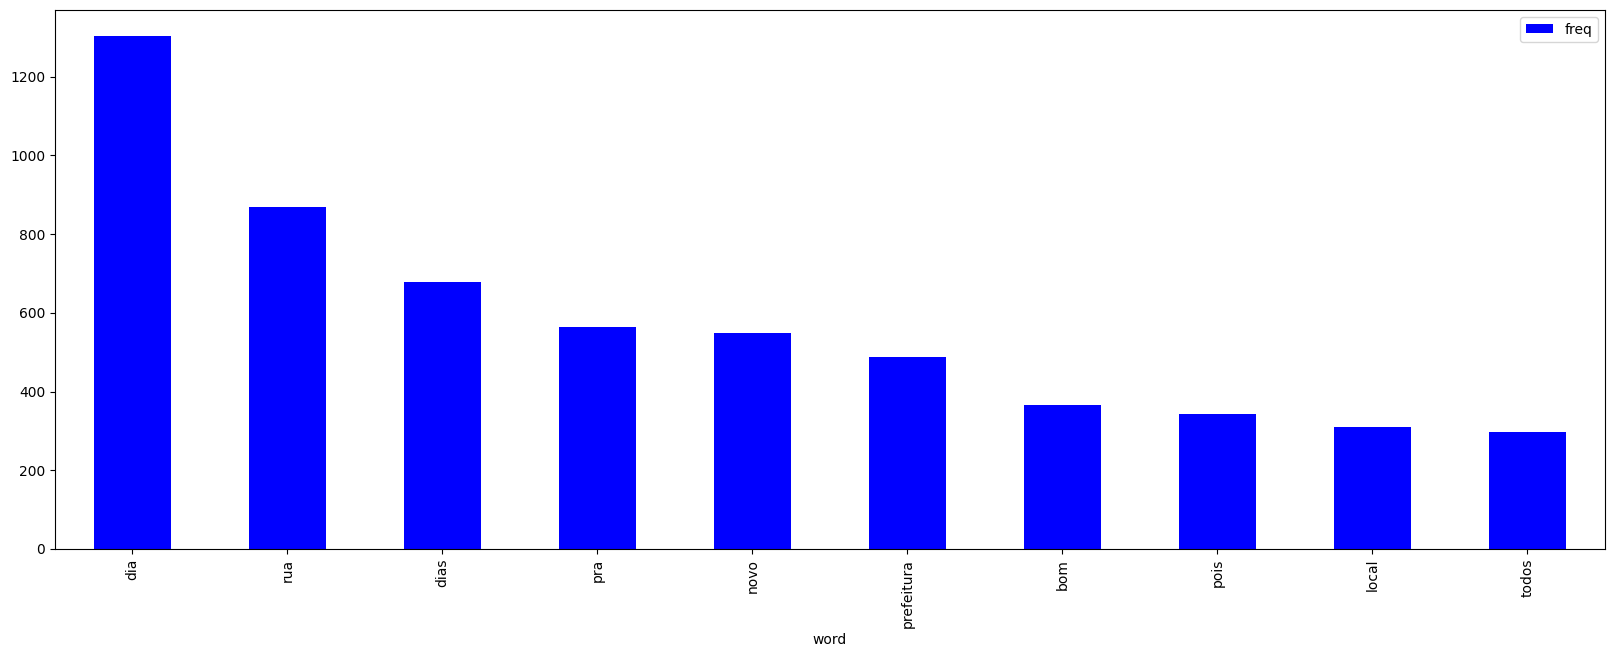

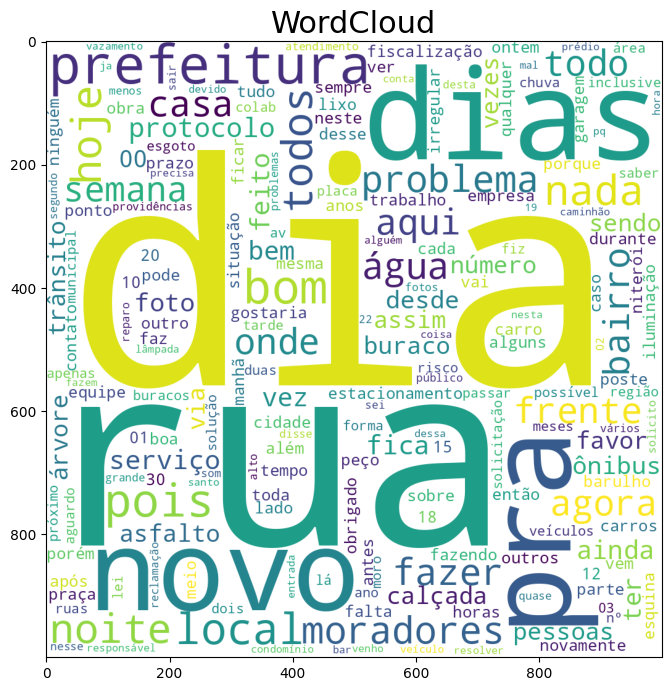

In [ ]:
# Visualizar a distribuição de palavras nos melhores scores
visualizarDistribuicaoPalavras(best_scores['description'], 10)

In [ ]:
# Exibir o mapa sintático de uma postagem com melhor score
exibirMapaSintatico(best_scores['description'].values[0])

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor    | Package |
--------------------------
| tokenize     | bosque  |
| mwt          | bosque  |
| pos          | bosque  |
| lemma        | bosque  |
| constituency | cintil  |
| depparse     | bosque  |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


boa             ADJ   ═╗═╗                                   root
tarde           ADV   <╝ ║                                   advmod
!               PUNCT <══╝                                   punct
venho           VERB  ═════════════════════════════════════╗ root
solicitar       VERB  ═══╗═╗═══════════════════════╗═╗═╗═╗<╝ xcomp
a               DET   <╗ ║ ║                       ║ ║ ║ ║   det
prefeitura      NOUN  ═╝<╝ ║                       ║ ║ ║ ║   obj
,               PUNCT <════╝                       ║ ║ ║ ║   punct
que             SCONJ <══════════════════════════╗ ║ ║ ║ ║   mark
a               DET   <════════════════════════╗ ║ ║ ║ ║ ║   det
mesma           ADJ   <══════════════════════╗ ║ ║ ║ ║ ║ ║   amod
intervenha      VERB  ═════════════════════╗═╝═╝═╝<╝ ║ ║ ║   advcl
em              ADP   <══════════════════╗ ║         ║ ║ ║   case
as              DET   <════════════════╗ ║ ║         ║ ║ ║   det
ações           NOUN  ═╗═════════════╗═╝═╝<╝         ║ ║ ║   obl
irregular

/usr/local/lib/python3.10/dist-packages/stanza/utils/conll.py:126: UserWarning: doc2conll is deprecated.  Please use "{:C}".format(doc) and use the text format directly
  doc_conll = CoNLL.doc2conll(doc, include_comments=False)
/usr/local/lib/python3.10/dist-packages/deplacy/deplacy.py:290: UserWarning: convert_dict is deprecated.  Please use "{:C}".format(doc) and use the text format directly
  return CoNLL.conll_as_string(CoNLL.convert_dict(doc.to_dict()))
/usr/local/lib/python3.10/dist-packages/deplacy/deplacy.py:290: UserWarning: conll_as_string is deprecated.  Please use "{:C}".format(doc) and use the text format directly
  return CoNLL.conll_as_string(CoNLL.convert_dict(doc.to_dict()))


In [ ]:
# Exibir os valores associados a cada palavra da postagem com melhor score
printLexiconPhrase(best_scores['description'].values[0])

# Exportando dataset para treinamento do classificador

In [ ]:
# Concatenar os dataframes dos piores e melhores scores
random_sample = dataset.sample(n=2000, replace=False)
frames = [random_sample, worst_scores, best_scores]
result = pd.concat(frames).drop_duplicates().reset_index(drop=True).sort_values(by='score', ascending=True)
# Salvar o dataframe como CSV
result.to_csv('colab_sentiment_training.csv', encoding='utf-8-sig', index=False)